# PERFORMANCE OF MACHINE LEARNING MODELS FOR USED CAR PRICE PREDICTION

This project is based on used car price prediction. The dataset is taken from Kaggle, an open online community for machine learning professionals. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import warnings

# DATA COLLECTION

In [2]:
# Load the data set csv file and have a look on it
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# DATA PREPARATION

In [3]:
#Basic Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
# Total null values in each of the column
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

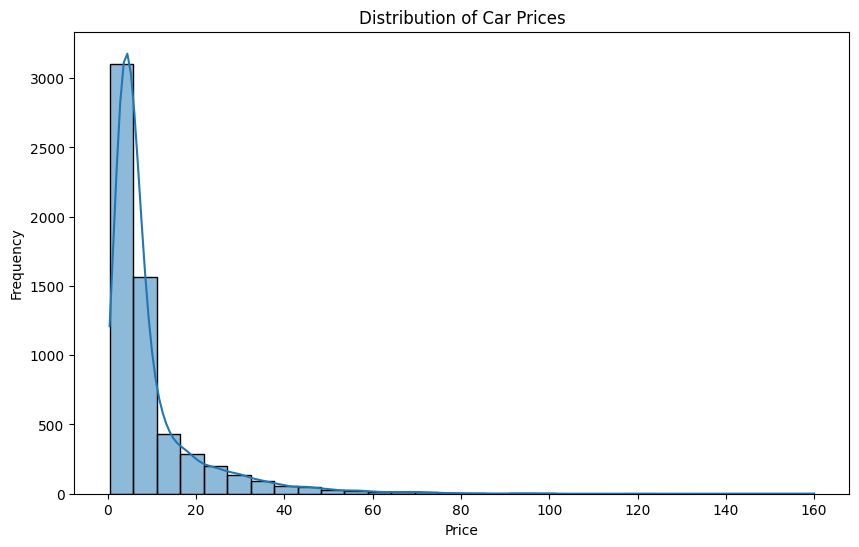

In [5]:
# Checking the target variable behaviour
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [6]:
#descriptive statiscics
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
#Missng data in percentage
missing_perc = (df.isnull().mean() * 100).round(2)
print(missing_perc.apply(lambda x: f"{x}%"))

Unnamed: 0             0.0%
Name                   0.0%
Location               0.0%
Year                   0.0%
Kilometers_Driven      0.0%
Fuel_Type              0.0%
Transmission           0.0%
Owner_Type             0.0%
Mileage               0.03%
Engine                 0.6%
Power                  0.6%
Seats                  0.7%
New_Price            86.31%
Price                  0.0%
dtype: object


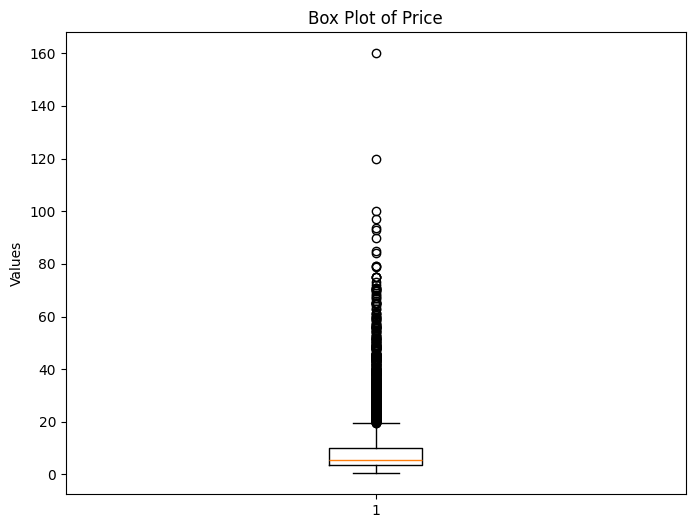

In [8]:
#Checking for outliers in our target variable using box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Values')
plt.show()

# EXPLORATORY DATA ANALYSIS

In [9]:
#Removing the unneccessary columns
df.drop(df.columns[df.columns.str.contains('^Unnamed')], axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
# Droping the rows having null values in any of the columns
df.dropna(subset=['Mileage'], inplace=True)
df.dropna(subset=['Engine'], inplace=True)
df.dropna(subset=['Power'], inplace=True)
df.dropna(subset=['Seats'], inplace=True)

In [11]:
#Missng data in percentage
missing_perc = (df.isnull().mean() * 100).round(2)
print(missing_perc.apply(lambda x: f"{x}%"))

Name                   0.0%
Location               0.0%
Year                   0.0%
Kilometers_Driven      0.0%
Fuel_Type              0.0%
Transmission           0.0%
Owner_Type             0.0%
Mileage                0.0%
Engine                 0.0%
Power                  0.0%
Seats                  0.0%
New_Price            86.23%
Price                  0.0%
dtype: object


In [12]:
# Droping "New Price" column because more than 85% data is null in this column
df = df.drop('New_Price', axis=1)

In [13]:
#Updated non-null data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [14]:
#Removing the outliers
df = df[df['Price'] <= 12]

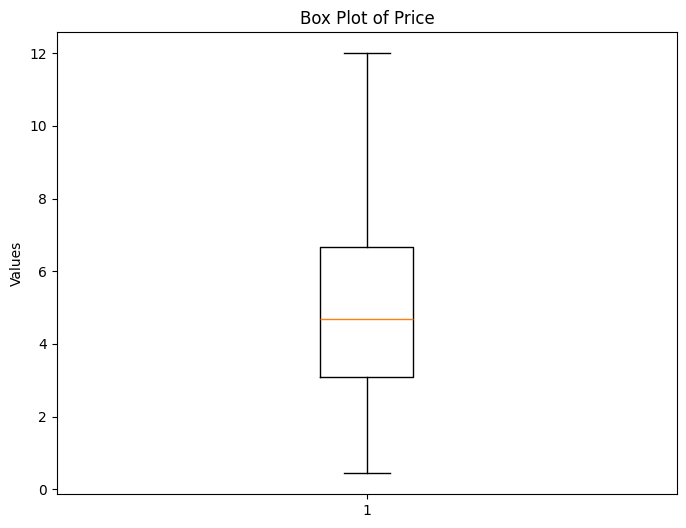

In [15]:
#Updated box plot of "Price" column having no outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Values')
plt.show()

In [16]:
#Final remaining data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4747 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4747 non-null   object 
 1   Location           4747 non-null   object 
 2   Year               4747 non-null   int64  
 3   Kilometers_Driven  4747 non-null   int64  
 4   Fuel_Type          4747 non-null   object 
 5   Transmission       4747 non-null   object 
 6   Owner_Type         4747 non-null   object 
 7   Mileage            4747 non-null   object 
 8   Engine             4747 non-null   object 
 9   Power              4747 non-null   object 
 10  Seats              4747 non-null   float64
 11  Price              4747 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 482.1+ KB


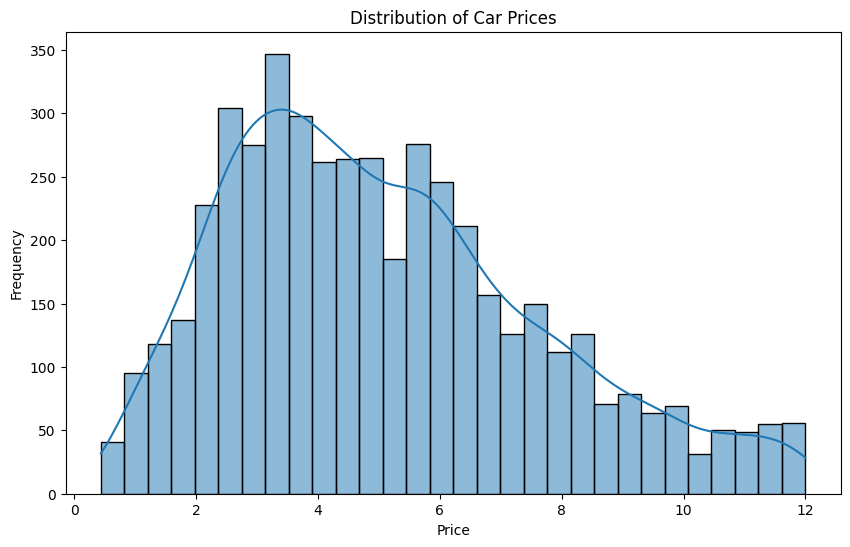

In [17]:
#Lets have a look on frequency distribution graph of price again
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [18]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


In [19]:
# Making type int for the numerical data columns
df['Power'] = df['Power'].str.extract(r'(\d+)').astype(float)
df['Engine'] = df['Engine'].str.extract(r'(\d+)').astype(float)
df['Mileage'] = df['Mileage'].apply(lambda x: float(x.split()[0]))
df['Seats'] = df['Seats'].astype(int)

In [20]:
# check how many categorical columns we have now
categorical_features = df.select_dtypes(include='object').columns
len(categorical_features)

5

In [21]:
#Checking for the unique values in the categorical columns
for i in categorical_features:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in Name are:  1504
The no.of unique values in Location are:  11
The no.of unique values in Fuel_Type are:  4
The no.of unique values in Transmission are:  2
The no.of unique values in Owner_Type are:  4


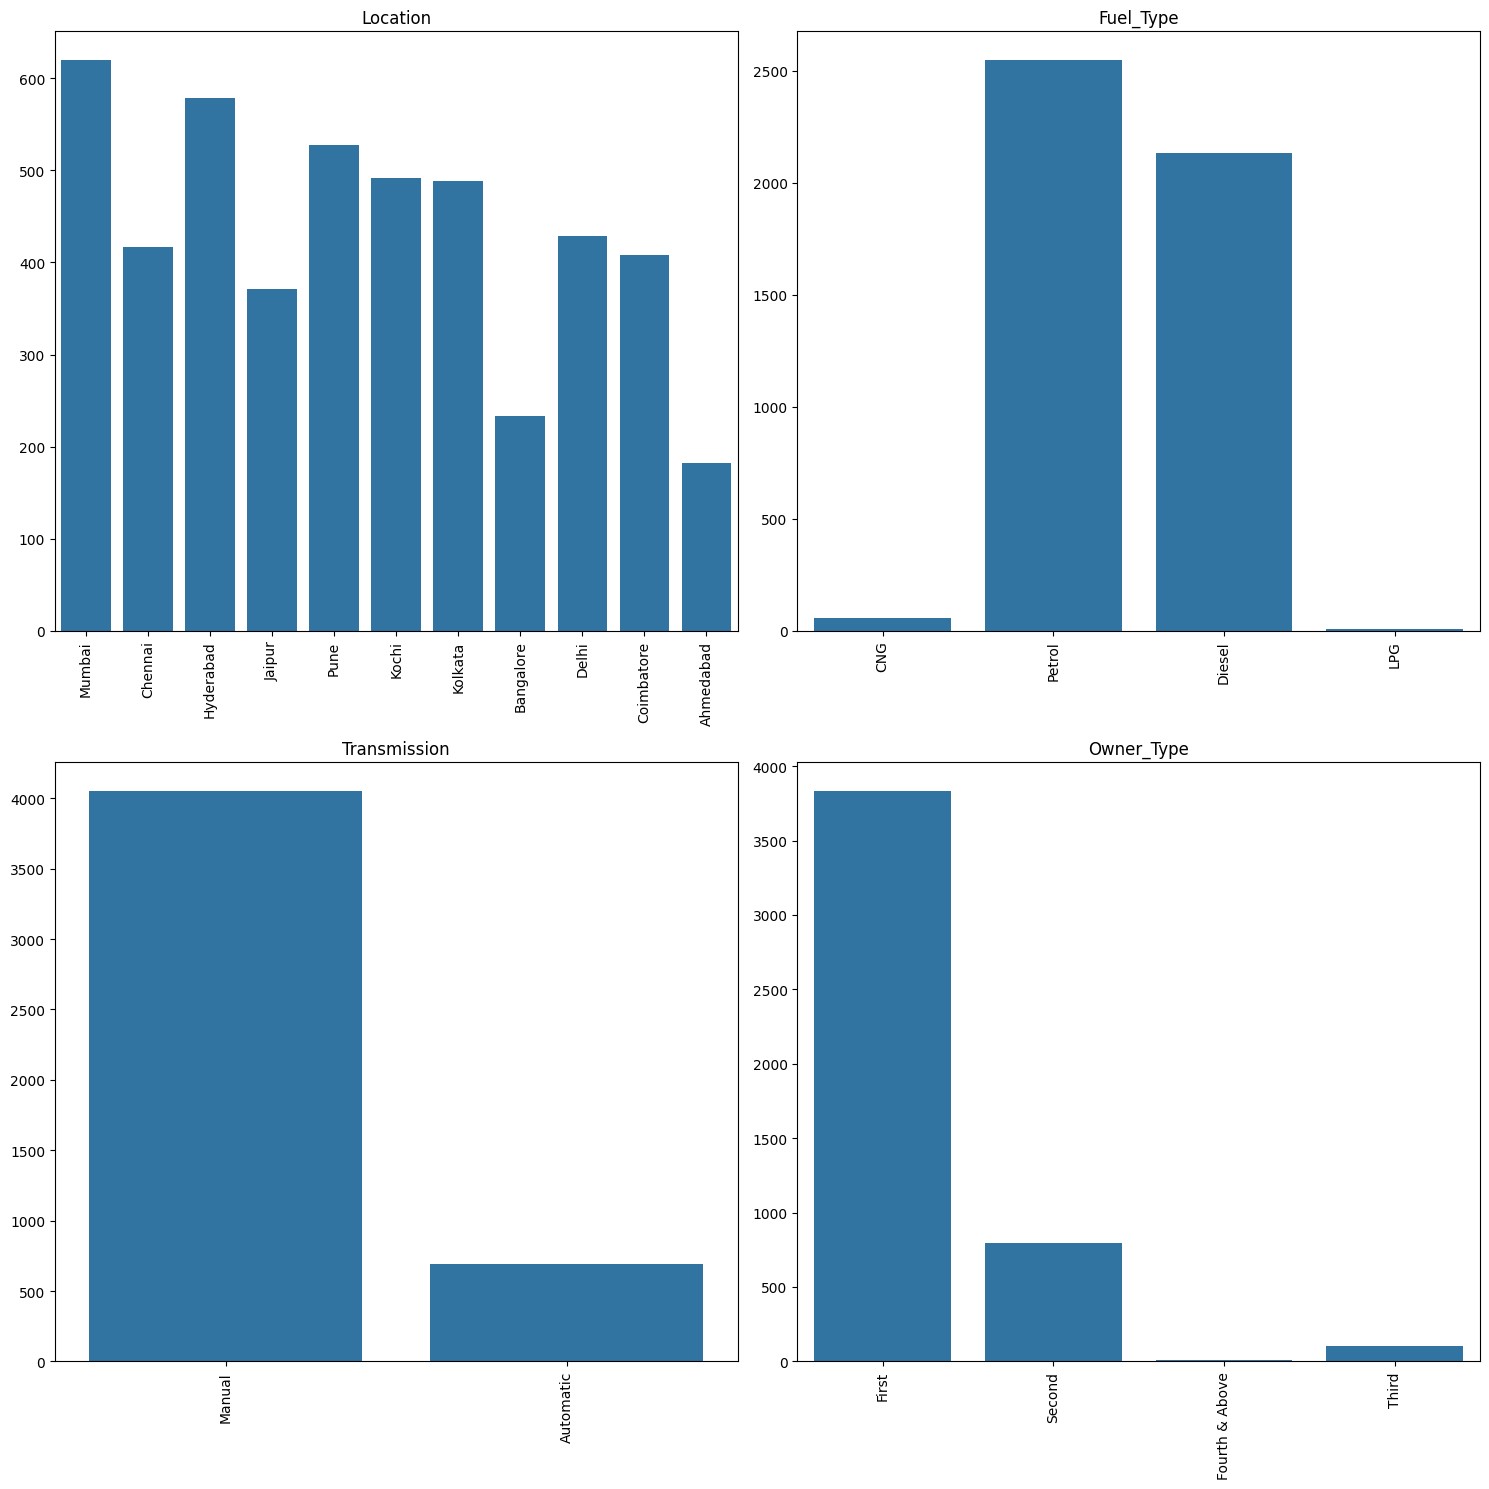

In [22]:
# visualizing the distribution of our categorical columns
num_plots = len(categorical_features) - 1
num_cols = 2
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_features[1:]): 
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

for i in range(num_plots, num_rows * num_cols):
    axes[i].set_visible(False)
   
fig.tight_layout()

plt.show()

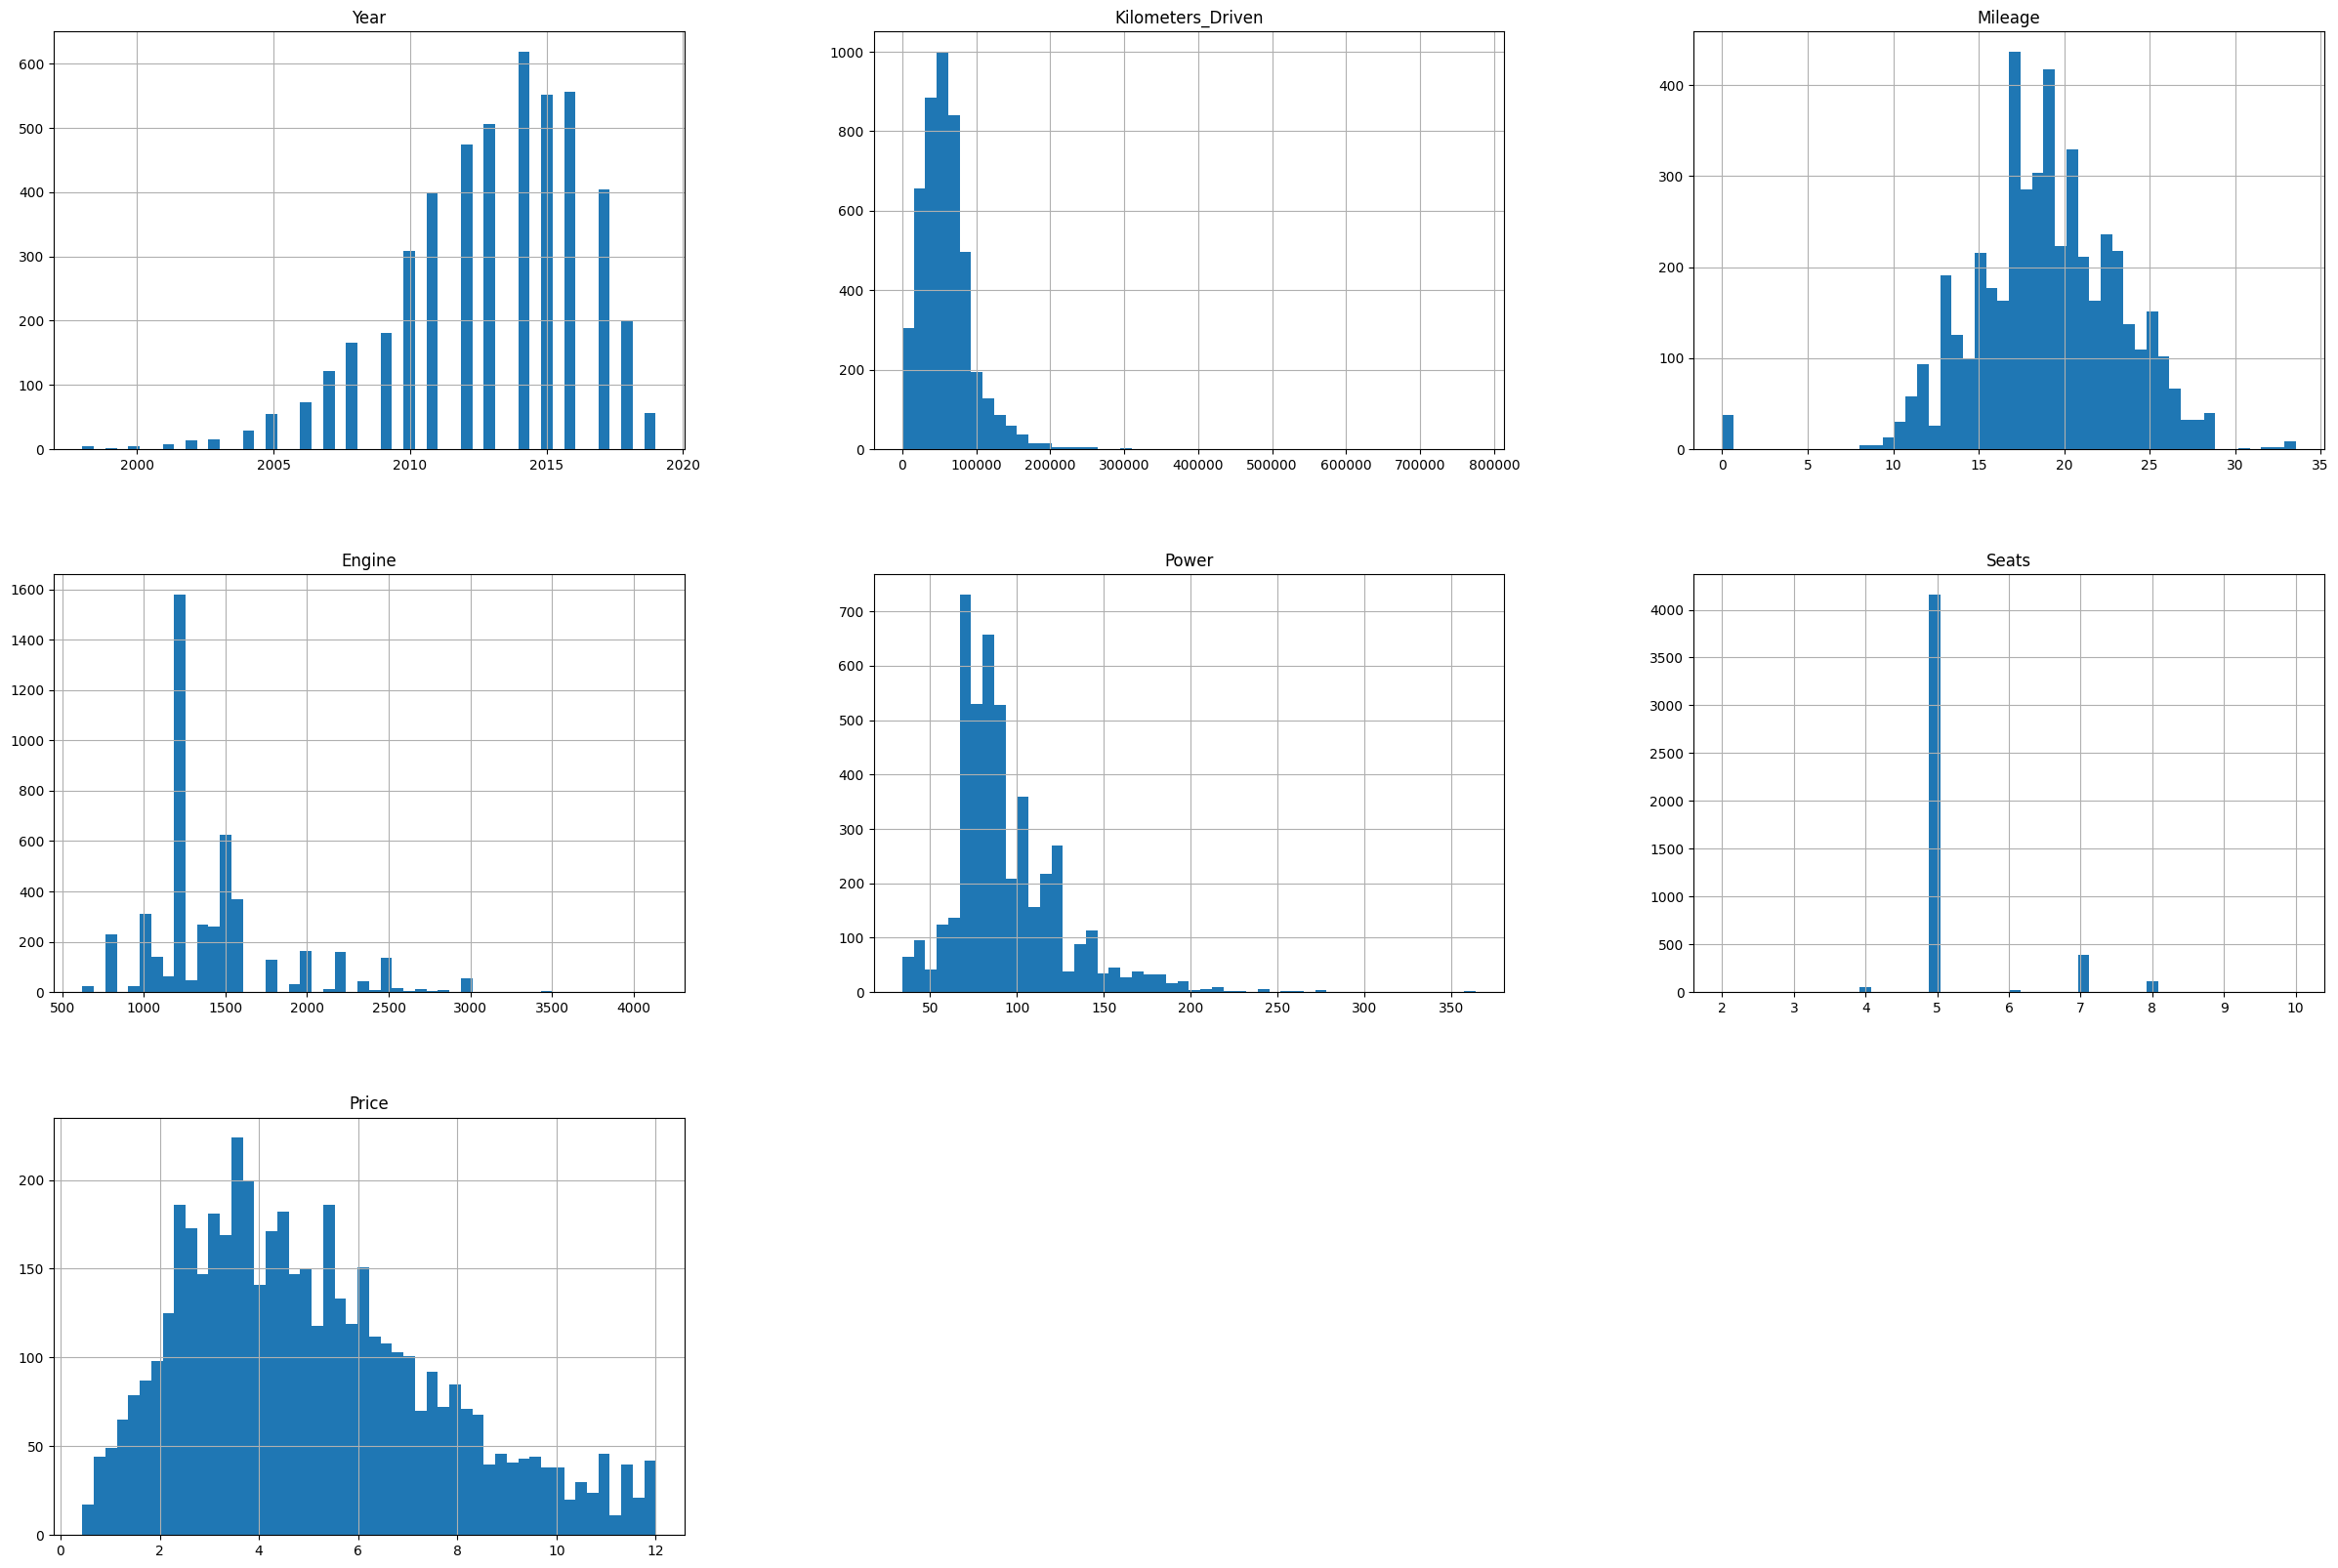

In [23]:
# visualizing the distribution of our numerical columns
df.hist(bins=50, figsize=(30,20))
plt.show()

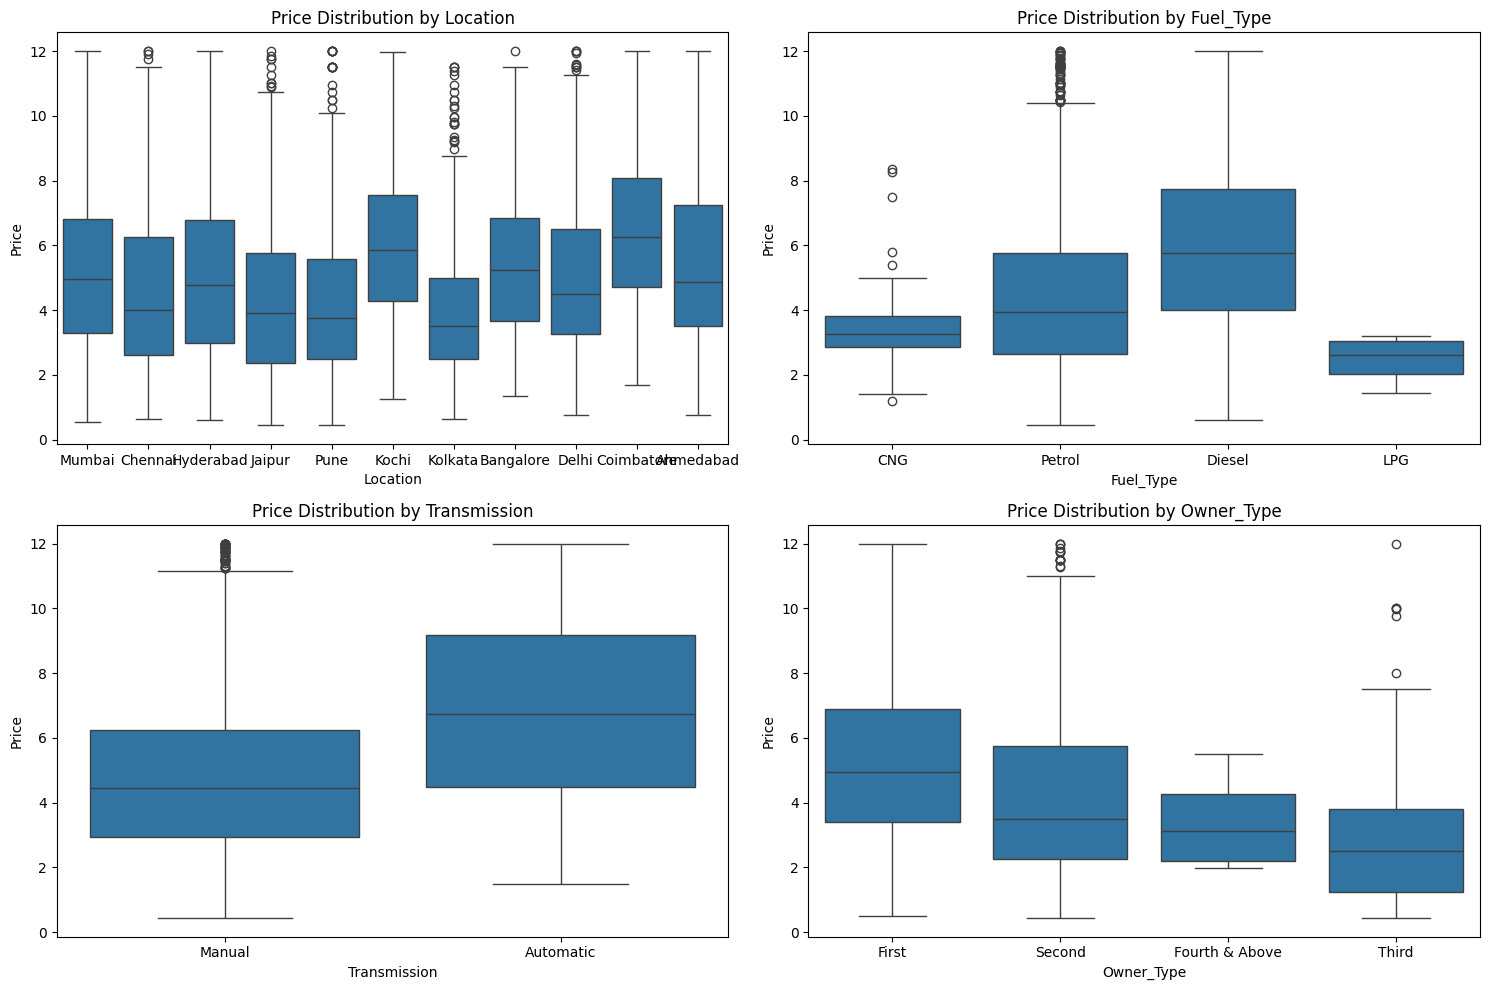

In [24]:
# visualizing the categorical columns, excluding the 'Name' column for plotting because it has too many categories in it
categorical_features = [col for col in categorical_features if col != 'Name']

num_plots = len(categorical_features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.boxplot(x=col, y='Price', data=df, ax=axes[i])
    axes[i].set_title(f'Price Distribution by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

for i in range(num_plots, len(axes)):
    axes[i].set_visible(False)

fig.tight_layout()

plt.show()

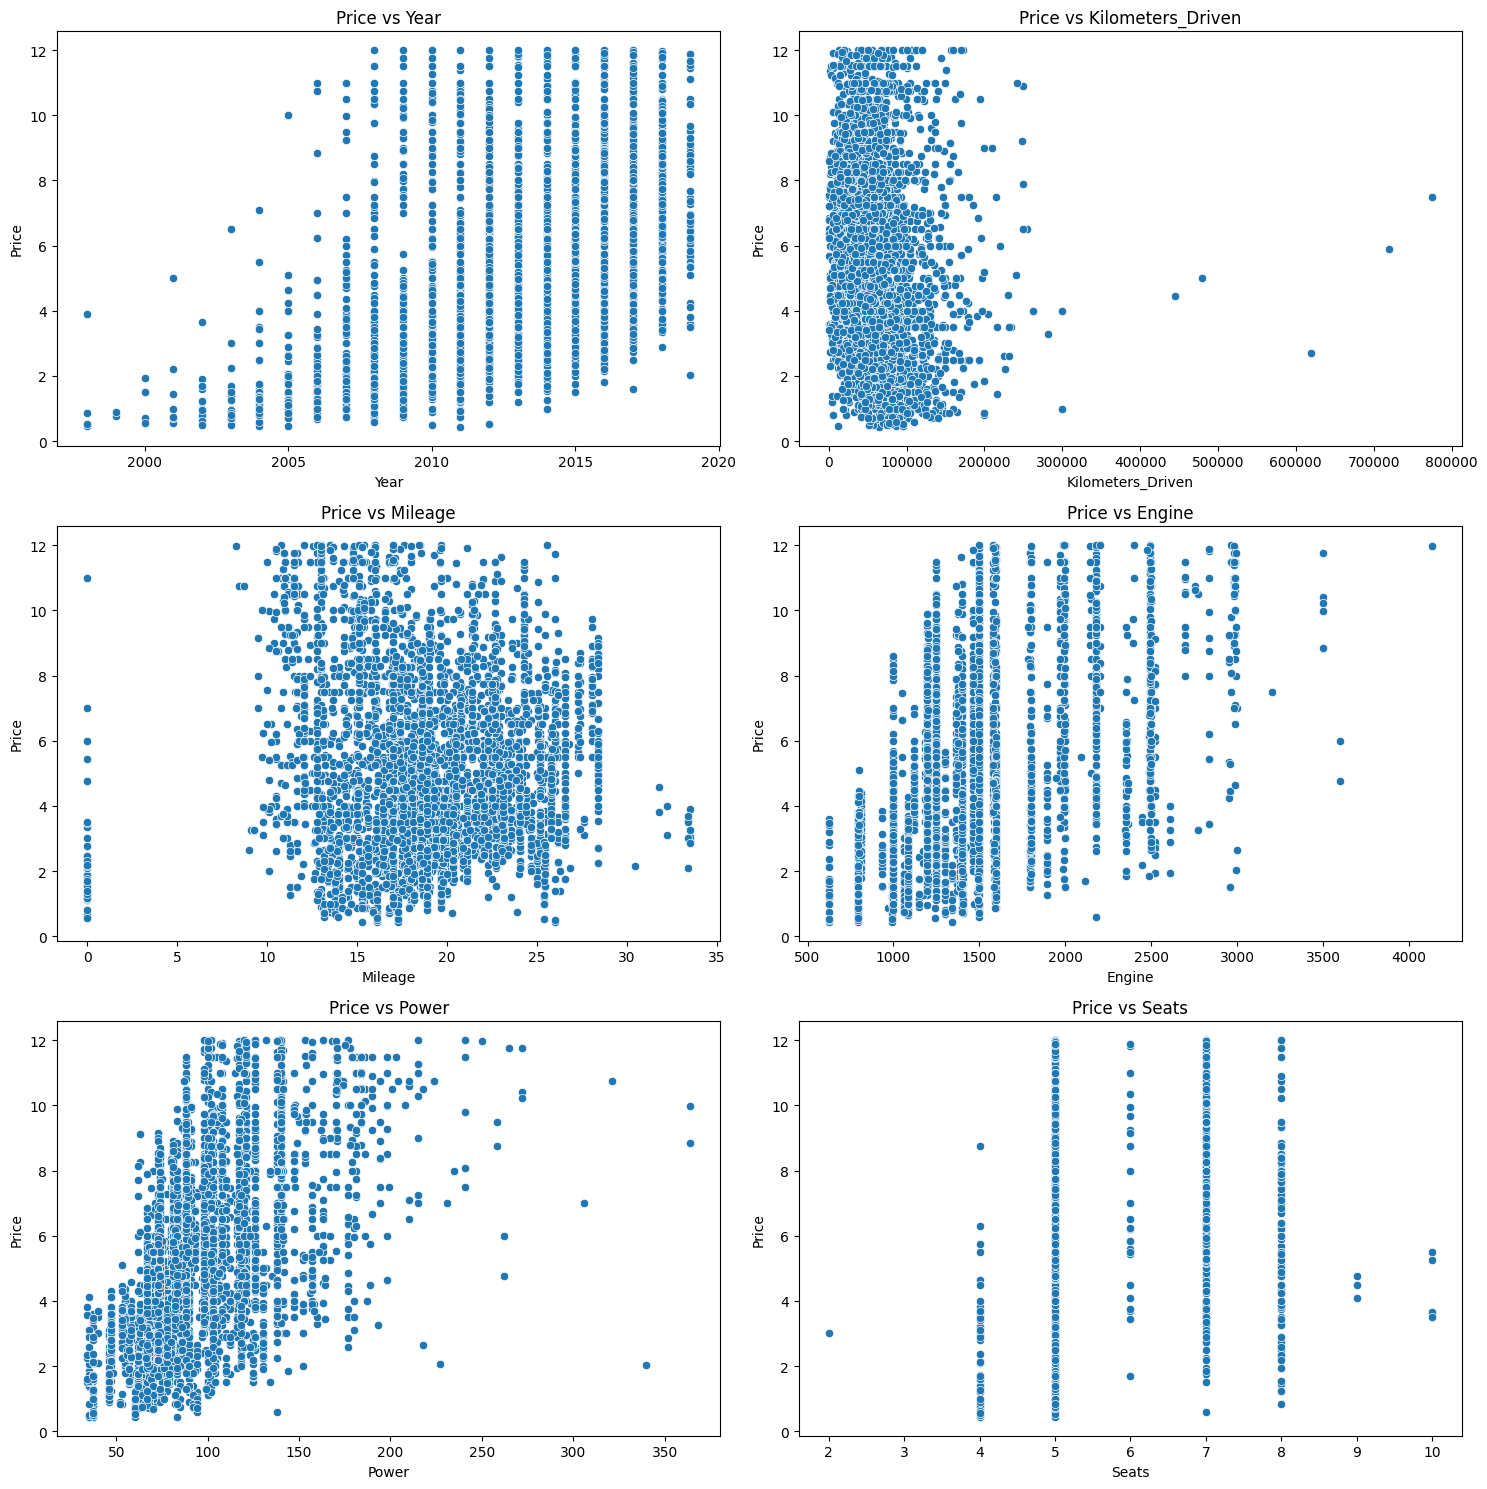

In [25]:
# visualizing the numerical columns
numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
num_plots = len(numerical_features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.scatterplot(x=col, y='Price', data=df, ax=axes[i])
    axes[i].set_title(f'Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

for i in range(num_plots, len(axes)):
    axes[i].set_visible(False)

fig.tight_layout()

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

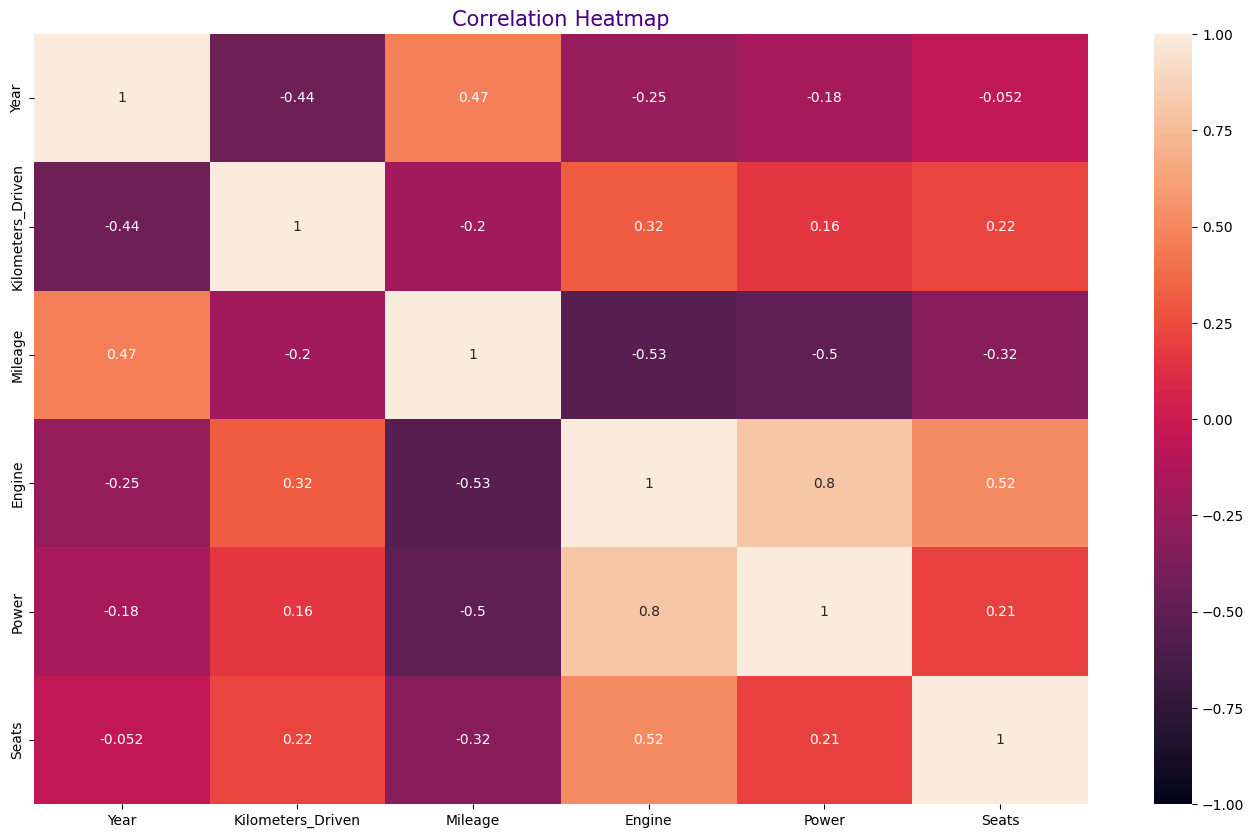

In [26]:
# correlation matrix
corr_matrix =df[numerical_features].corr()
plt.figure(figsize=(17,10))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap',color='indigo', font='Verdana', fontsize=15)

In [27]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.0,5,1.75
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.0,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.0,7,6.00
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.0,5,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.0,5,3.50


# ENCODING

In [28]:
# Separate the features and target varialbe
X = df.drop('Price', axis=1)
y = df['Price']

In [29]:
# Define numerical and categorical features
numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
categorical_features = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [30]:
# Split the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Encode categorical features
label_encoders = {col: LabelEncoder() for col in categorical_features}
for col in categorical_features:
    X[col] = label_encoders[col].fit_transform(X[col])

In [32]:
# Define numerical transformer with PCA
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [33]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ], 
    remainder='passthrough'
)

# MODEL IMPLEMENTATION

In [34]:
# Define models and their hyperparameters
models = {
    'LinearRegression': (LinearRegression(), {'model__fit_intercept': [True, False]}),
    'Ridge': (Ridge(), {'model__alpha': [0.1, 1.0, 10.0, 100.0], 'model__solver': ['auto', 'lsqr', 'sparse_cg', 'sag', 'saga']}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'model__n_neighbors': [5, 10, 15, 20, 25], 'model__weights': ['uniform', 'distance'], 'model__p': [1, 2]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(random_state=42), {'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 10], 'model__min_samples_leaf': [1, 2], 'model__max_features': [None, 'sqrt']}),
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), {'model__n_estimators': [50, 100], 'model__max_depth': [None, 10], 'model__min_samples_split': [2, 5], 'model__min_samples_leaf': [1, 2], 'model__max_features': ['sqrt']})
}

In [35]:
# Define function to perform GridSearchCV and cross-validation
def perform_grid_search(model, param_grid, X_train, y_train):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

In [36]:
# Define a function to plot diagnostics
def plot_diagnostics(model, X_test, y_test, title_prefix):
    y_pred = model.predict(X_test)
    
    # Residuals Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.title(f'{title_prefix} - Residuals Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')

    # Predicted vs Actual Values Plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'{title_prefix} - Predicted vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    
    plt.tight_layout()
    plt.show()

Evaluating LinearRegression...
Model: LinearRegression
Best hyperparameters: {'model__fit_intercept': True}
Training R²: 0.6969 (± 0.0061)
Training RMSE: 1.4153 (± 0.0140)
Training MAE: 1.0672 (± 0.0089)
Test R²: 0.6934 (± 0.0235)
Test RMSE: 1.4215 (± 0.0557)
Test MAE: 1.0710 (± 0.0348)



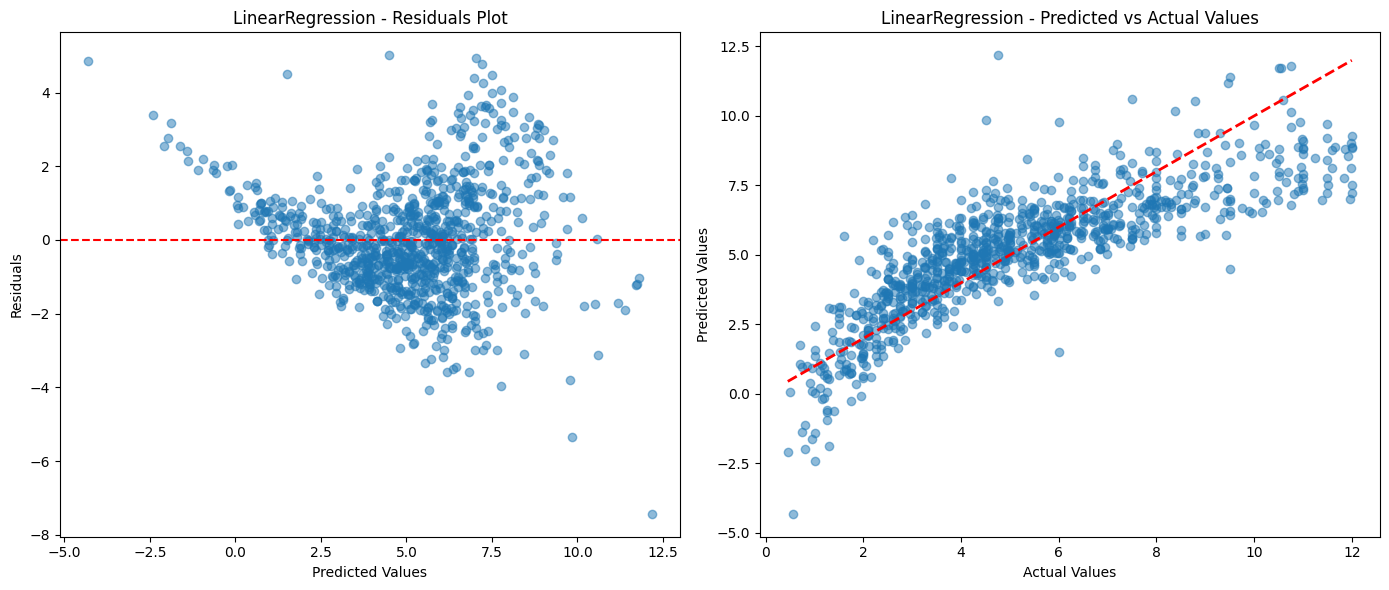

Evaluating Ridge...
Model: Ridge
Best hyperparameters: {'model__alpha': 0.1, 'model__solver': 'auto'}
Training R²: 0.6968 (± 0.0061)
Training RMSE: 1.4153 (± 0.0140)
Training MAE: 1.0674 (± 0.0089)
Test R²: 0.6934 (± 0.0234)
Test RMSE: 1.4214 (± 0.0554)
Test MAE: 1.0711 (± 0.0347)



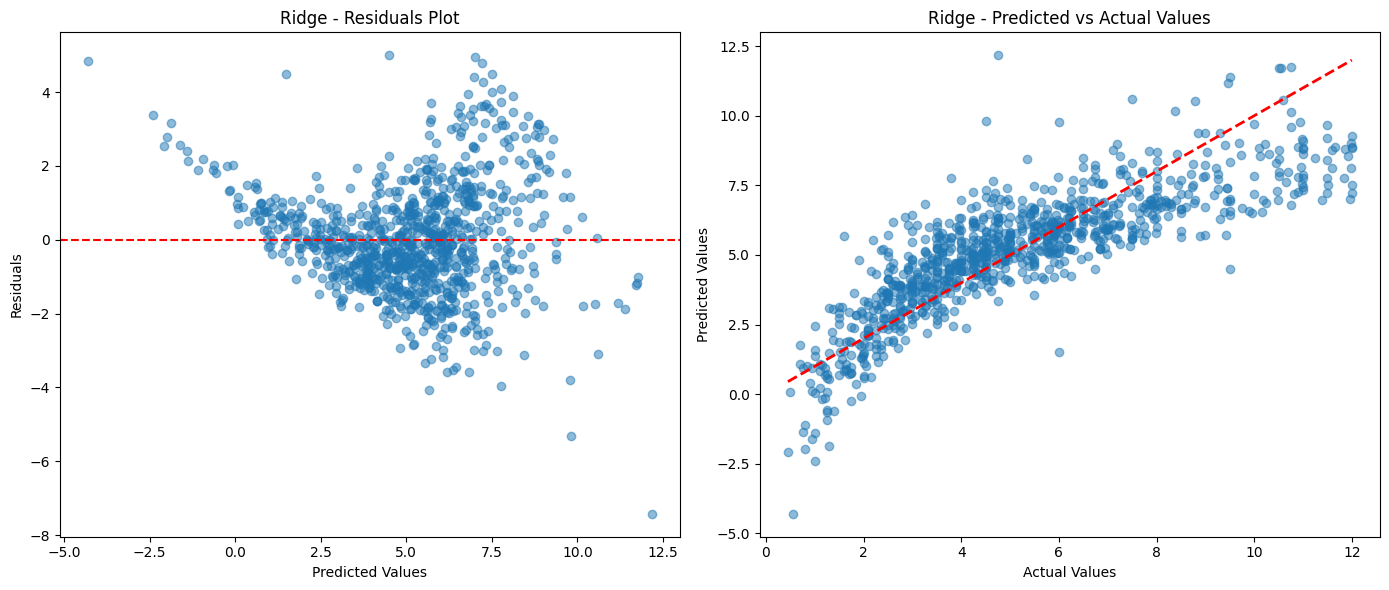

Evaluating KNeighborsRegressor...
Model: KNeighborsRegressor
Best hyperparameters: {'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}
Training R²: 1.0000 (± 0.0000)
Training RMSE: 0.0157 (± 0.0038)
Training MAE: 0.0007 (± 0.0001)
Test R²: 0.7022 (± 0.0153)
Test RMSE: 1.4013 (± 0.0231)
Test MAE: 0.9762 (± 0.0136)



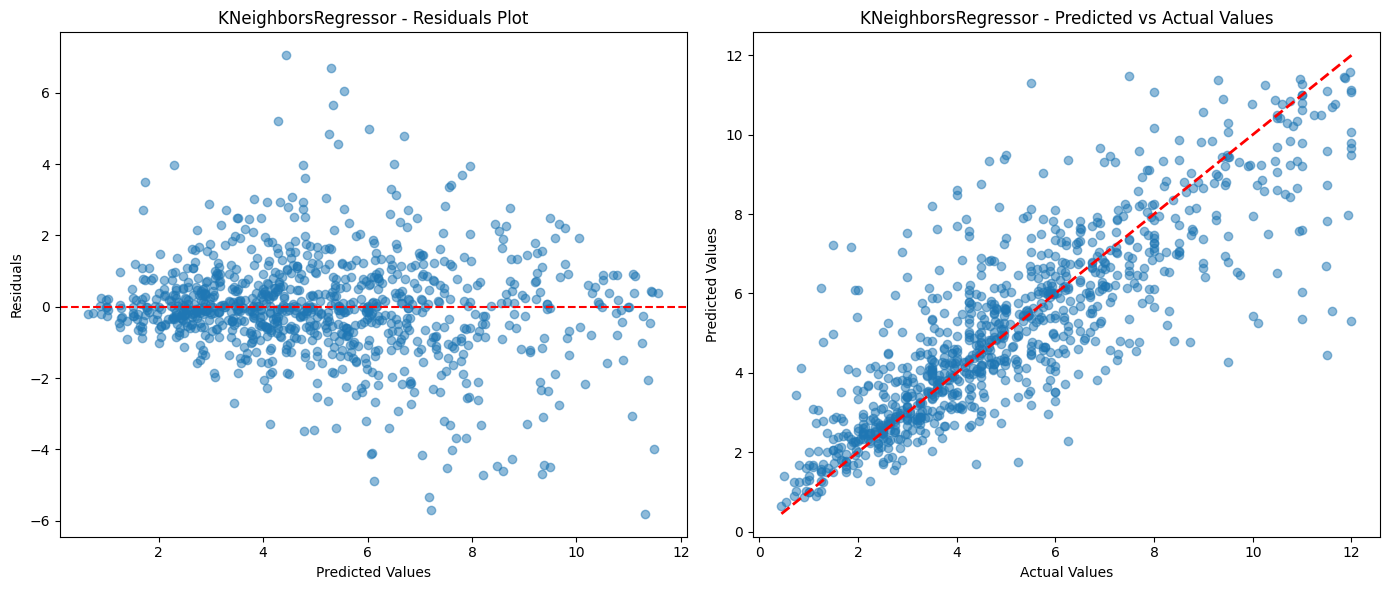

Evaluating DecisionTreeRegressor...
Model: DecisionTreeRegressor
Best hyperparameters: {'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10}
Training R²: 0.9006 (± 0.0033)
Training RMSE: 0.8104 (± 0.0115)
Training MAE: 0.5790 (± 0.0108)
Test R²: 0.7798 (± 0.0159)
Test RMSE: 1.2049 (± 0.0479)
Test MAE: 0.8464 (± 0.0256)



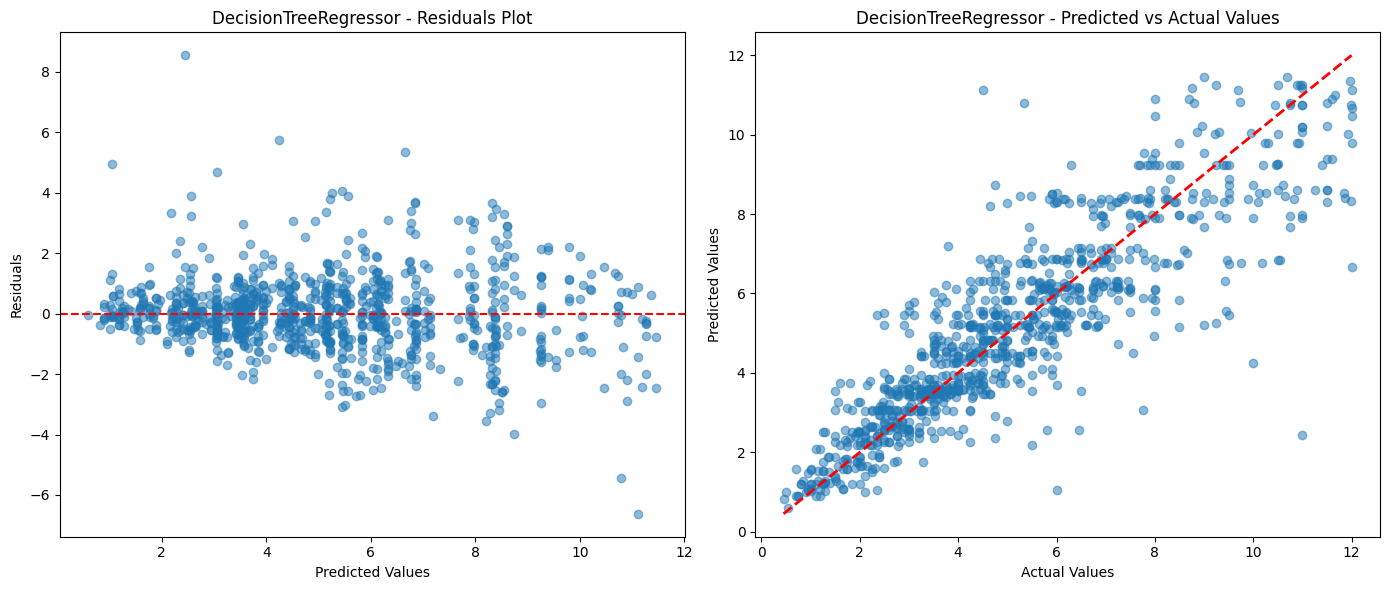

Evaluating RandomForestRegressor...
Model: RandomForestRegressor
Best hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Training R²: 0.9818 (± 0.0004)
Training RMSE: 0.3469 (± 0.0032)
Training MAE: 0.2441 (± 0.0022)
Test R²: 0.8747 (± 0.0066)
Test RMSE: 0.9092 (± 0.0297)
Test MAE: 0.6456 (± 0.0152)



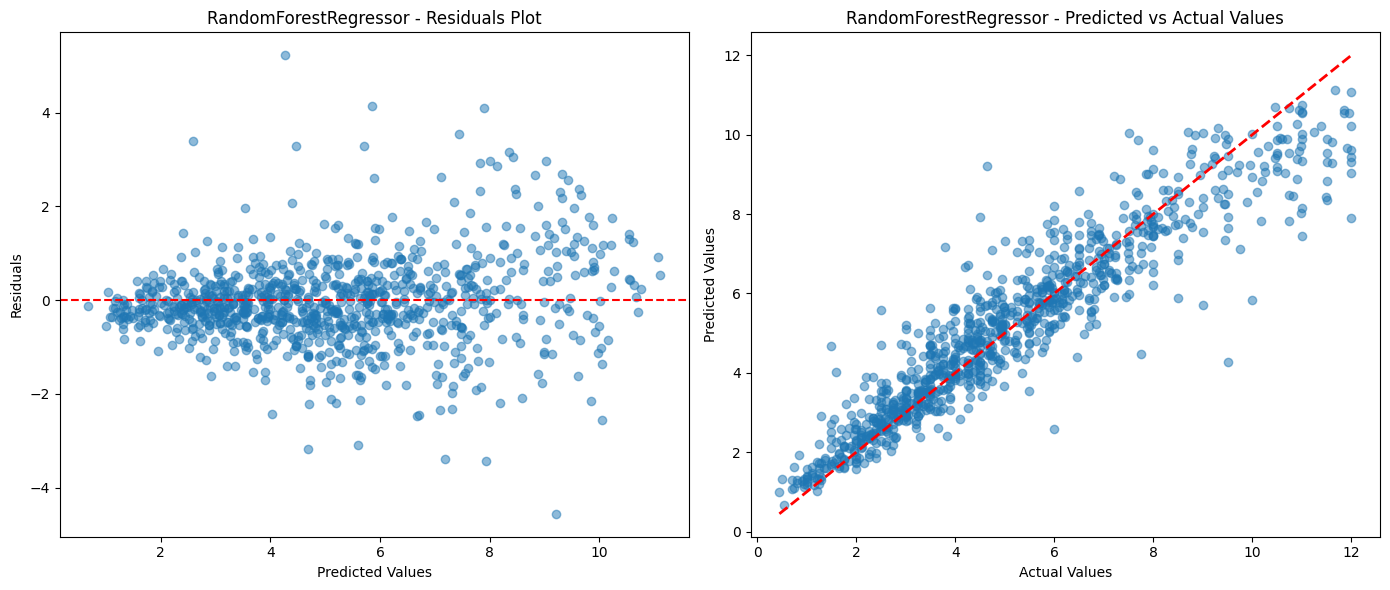

In [37]:
# Initialize list for storing results
results = []

# Perform grid search and evaluate models, including diagnostics
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, (model, param_grid) in models.items():
    print(f"Evaluating {name}...")

    # Initialize lists for storing results
    fold_results = []

    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Perform grid search
        grid_search = perform_grid_search(model, param_grid, X_train, y_train)
        best_model = grid_search.best_estimator_
        
        # Predictions and evaluations
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        fold_results.append({
            'Model': name,
            'Fold': fold,
            'Train R²': train_r2,
            'Test R²': test_r2,
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'Train MAE': train_mae,
            'Test MAE': test_mae
        })

    # Aggregate results
    fold_results_df = pd.DataFrame(fold_results)
    mean_train_r2 = fold_results_df['Train R²'].mean()
    std_train_r2 = fold_results_df['Train R²'].std()
    mean_test_r2 = fold_results_df['Test R²'].mean()
    std_test_r2 = fold_results_df['Test R²'].std()
    mean_train_rmse = fold_results_df['Train RMSE'].mean()
    std_train_rmse = fold_results_df['Train RMSE'].std()
    mean_test_rmse = fold_results_df['Test RMSE'].mean()
    std_test_rmse = fold_results_df['Test RMSE'].std()
    mean_train_mae = fold_results_df['Train MAE'].mean()
    std_train_mae = fold_results_df['Train MAE'].std()
    mean_test_mae = fold_results_df['Test MAE'].mean()
    std_test_mae = fold_results_df['Test MAE'].std()
    
    print(f"Model: {name}")
    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Training R²: {mean_train_r2:.4f} (± {std_train_r2:.4f})")
    print(f"Training RMSE: {mean_train_rmse:.4f} (± {std_train_rmse:.4f})")
    print(f"Training MAE: {mean_train_mae:.4f} (± {std_train_mae:.4f})")
    print(f"Test R²: {mean_test_r2:.4f} (± {std_test_r2:.4f})")
    print(f"Test RMSE: {mean_test_rmse:.4f} (± {std_test_rmse:.4f})")
    print(f"Test MAE: {mean_test_mae:.4f} (± {std_test_mae:.4f})\n")

    # Store aggregated results
    results.append({
        'Model': name,
        'Mean Train R²': mean_train_r2,
        'Std Train R²': std_train_r2,
        'Mean Test R²': mean_test_r2,
        'Std Test R²': std_test_r2,
        'Mean Train RMSE': mean_train_rmse,
        'Std Train RMSE': std_train_rmse,
        'Mean Test RMSE': mean_test_rmse,
        'Std Test RMSE': std_test_rmse,
        'Mean Train MAE': mean_train_mae,
        'Std Train MAE': std_train_mae,
        'Mean Test MAE': mean_test_mae,
        'Std Test MAE': std_test_mae
    })

    # Append fold-specific results to main DataFrame
    df_fold_results = pd.concat([df_fold_results, fold_results_df], ignore_index=True) if 'df_fold_results' in locals() else fold_results_df

    # Plot diagnostics
    plot_diagnostics(best_model, X_test, y_test, name)

    # Suppress warnings from model fitting
    warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
    warnings.filterwarnings("ignore", category=RuntimeWarning, module="numpy")

df_results = pd.DataFrame(results)

# Combine fold-specific results with aggregated results for export
df_combined_results = pd.concat([df_fold_results, df_results], ignore_index=True)

In [38]:
# compare all models and their respective fold results and the best results
df_combined_results

,Model,Fold,Train R²,Test R²,Train RMSE,Test RMSE,Train MAE,Test MAE,Mean Train R²,Std Train R²,Mean Test R²,Std Test R²,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE
0,LinearRegression,1.0,0.687940,0.727565,1.426895,1.374664,1.072123,1.045967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LinearRegression,2.0,0.698300,0.687726,1.426446,1.375809,1.073667,1.053456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LinearRegression,3.0,0.693688,0.705877,1.422887,1.393068,1.070288,1.066528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LinearRegression,4.0,0.702426,0.670348,1.401454,1.479600,1.068399,1.057395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LinearRegression,5.0,0.701913,0.675508,1.398676,1.484350,1.051721,1.131870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ridge,1.0,0.687936,0.727599,1.426905,1.374579,1.072283,1.045918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ridge,2.0,0.698296,0.687677,1.426454,1.375918,1.073789,1.053701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ridge,3.0,0.693685,0.705684,1.422893,1.393526,1.070446,1.066783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ridge,4.0,0.702422,0.670649,1.401464,1.478923,1.068462,1.057489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ridge,5.0,0.701909,0.675563,1.398684,1.484224,1.051868,1.131800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Best results among the folds
df_results

,Model,Mean Train R²,Std Train R²,Mean Test R²,Std Test R²,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE
0,LinearRegression,0.696853,0.006087,0.693405,0.023488,1.415271,0.014003,1.421498,0.055712,1.067240,0.008897,1.071043,0.034802
1,Ridge,0.696850,0.006087,0.693434,0.023393,1.415280,0.014002,1.421434,0.055438,1.067370,0.008893,1.071138,0.034732
2,KNeighborsRegressor,0.999961,0.000017,0.702158,0.015336,0.015666,0.003783,1.401307,0.023052,0.000667,0.000149,0.976164,0.013641
3,DecisionTreeRegressor,0.900578,0.003312,0.779807,0.015900,0.810421,0.011527,1.204860,0.047902,0.579029,0.010775,0.846367,0.025627
4,RandomForestRegressor,0.981788,0.000413,0.874680,0.006638,0.346885,0.003154,0.909229,0.029715,0.244058,0.002171,0.645613,0.015163


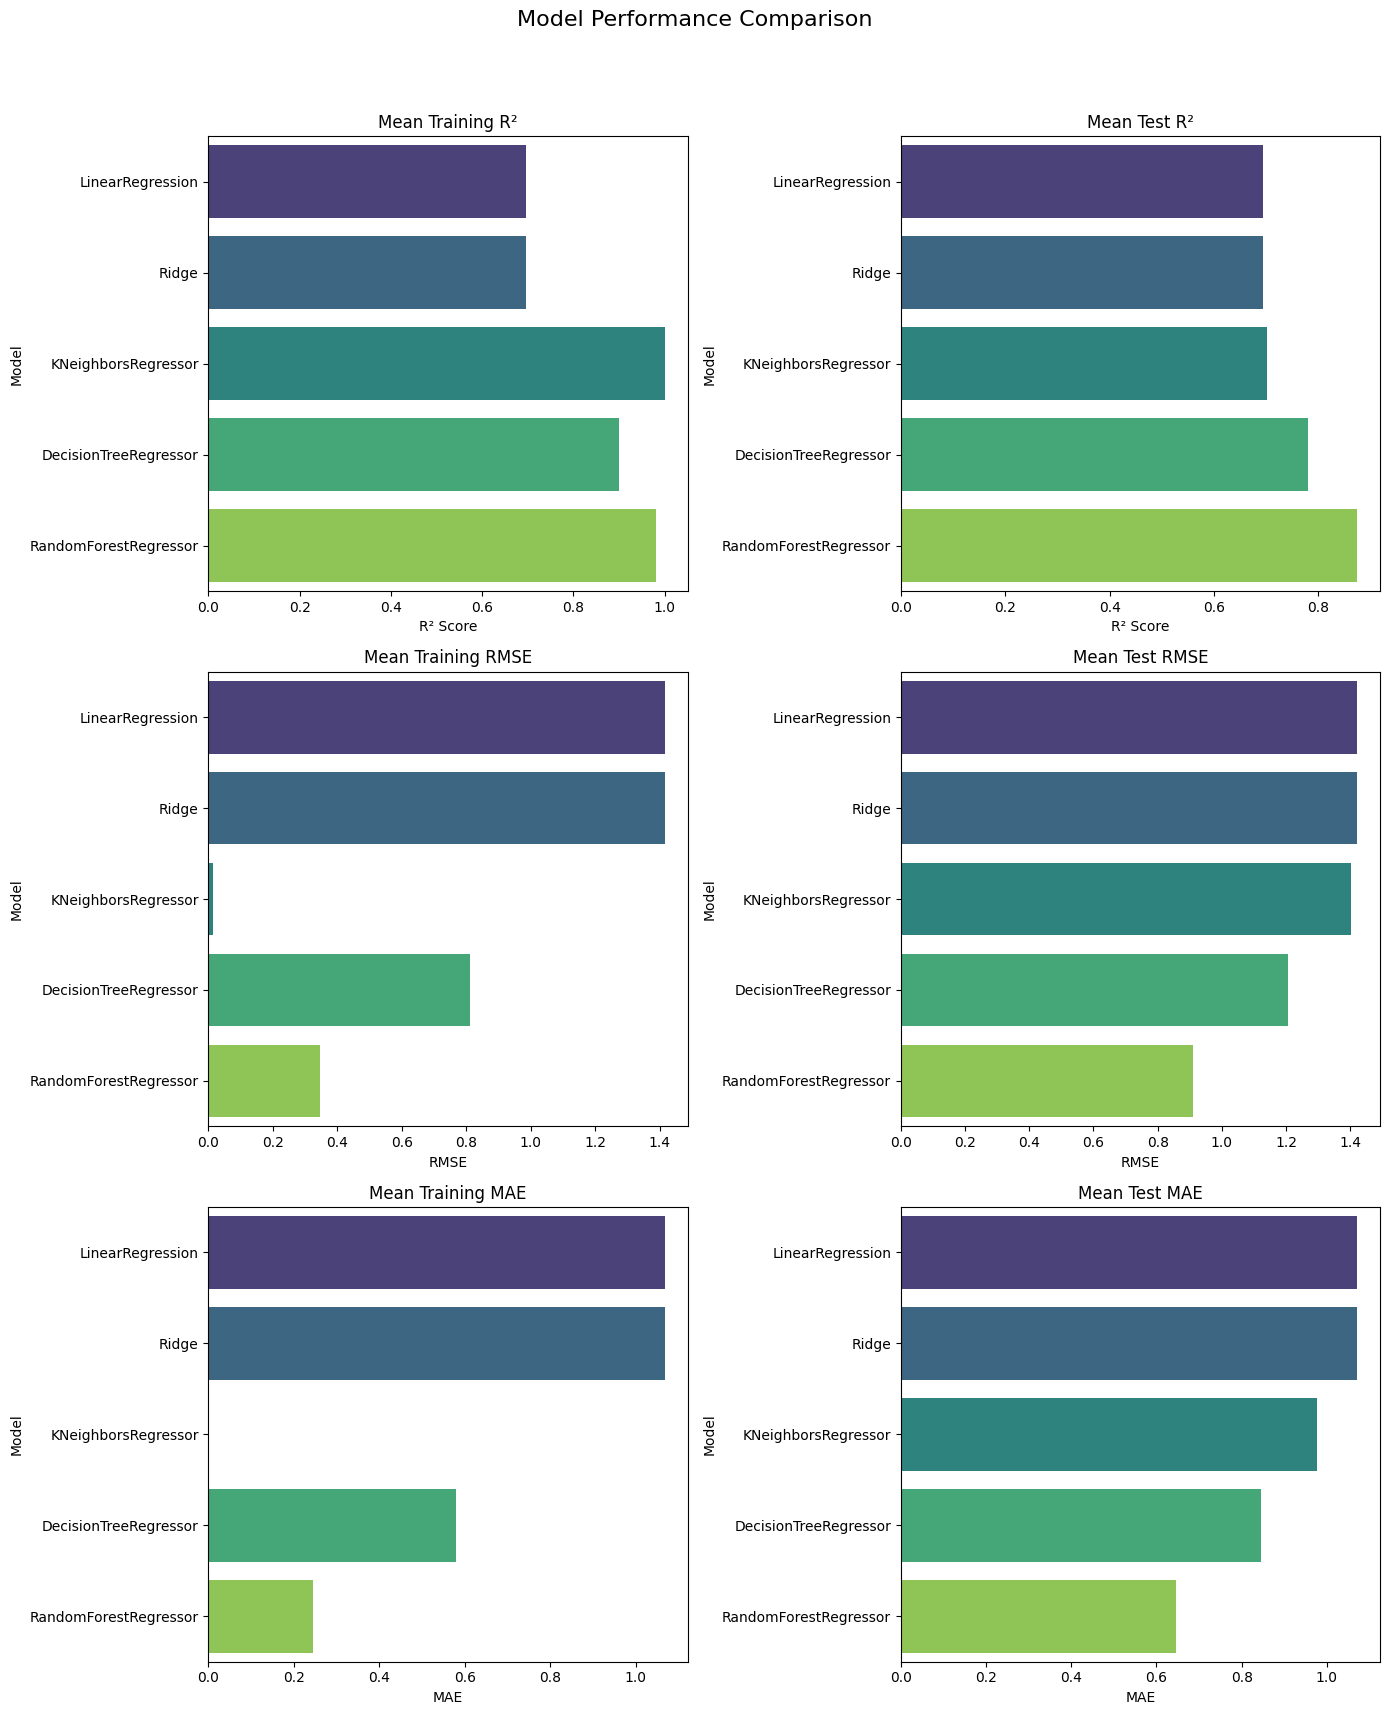

Best Model based on Test R²: RandomForestRegressor
Best Model based on Test RMSE: RandomForestRegressor
Best Model based on Test MAE: RandomForestRegressor


In [40]:
# Create a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Plot for Training R²
sns.barplot(x='Mean Train R²', y='Model', data=df_results, ax=axes[0, 0], palette='viridis', errorbar=None, hue='Model', dodge=False)
axes[0, 0].set_title('Mean Training R²')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_ylabel('Model')

# Plot for Test R²
sns.barplot(x='Mean Test R²', y='Model', data=df_results, ax=axes[0, 1], palette='viridis', errorbar=None, hue='Model', dodge=False)
axes[0, 1].set_title('Mean Test R²')
axes[0, 1].set_xlabel('R² Score')
axes[0, 1].set_ylabel('Model')

# Plot for Training RMSE
sns.barplot(x='Mean Train RMSE', y='Model', data=df_results, ax=axes[1, 0], palette='viridis', errorbar=None, hue='Model', dodge=False)
axes[1, 0].set_title('Mean Training RMSE')
axes[1, 0].set_xlabel('RMSE')
axes[1, 0].set_ylabel('Model')

# Plot for Test RMSE
sns.barplot(x='Mean Test RMSE', y='Model', data=df_results, ax=axes[1, 1], palette='viridis', errorbar=None, hue='Model', dodge=False)
axes[1, 1].set_title('Mean Test RMSE')
axes[1, 1].set_xlabel('RMSE')
axes[1, 1].set_ylabel('Model')

# Plot for Training MAE
sns.barplot(x='Mean Train MAE', y='Model', data=df_results, ax=axes[2, 0], palette='viridis', errorbar=None, hue='Model', dodge=False)
axes[2, 0].set_title('Mean Training MAE')
axes[2, 0].set_xlabel('MAE')
axes[2, 0].set_ylabel('Model')

# Plot for Test MAE
sns.barplot(x='Mean Test MAE', y='Model', data=df_results, ax=axes[2, 1], palette='viridis', errorbar=None, hue='Model', dodge=False)
axes[2, 1].set_title('Mean Test MAE')
axes[2, 1].set_xlabel('MAE')
axes[2, 1].set_ylabel('Model')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Identify the best model based on the test R², test RMSE, and test MAE
best_model_r2 = df_results.loc[df_results['Mean Test R²'].idxmax(), 'Model']
best_model_rmse = df_results.loc[df_results['Mean Test RMSE'].idxmin(), 'Model']
best_model_mae = df_results.loc[df_results['Mean Test MAE'].idxmin(), 'Model']

print(f"Best Model based on Test R²: {best_model_r2}")
print(f"Best Model based on Test RMSE: {best_model_rmse}")
print(f"Best Model based on Test MAE: {best_model_mae}")


# FEATURE IMPORTANCE

Lets have a look on the importantance of the features on which the best performing model i.e. Random Forest Regressor depends.

In [44]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

# Get the feature importances
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})

In [46]:
importances['Feature_importances'] = rf_model.feature_importances_
imp = importances.sort_values(by='Feature_importances',ascending=False)
imp

,Feature,Importance,Feature_importances
9,Power,0.402926,0.402926
2,Year,0.262511,0.262511
8,Engine,0.141049,0.141049
0,Name,0.063630,0.063630
7,Mileage,0.041351,0.041351
3,Kilometers_Driven,0.036806,0.036806
1,Location,0.031353,0.031353
5,Transmission,0.006546,0.006546
4,Fuel_Type,0.004962,0.004962
6,Owner_Type,0.004500,0.004500


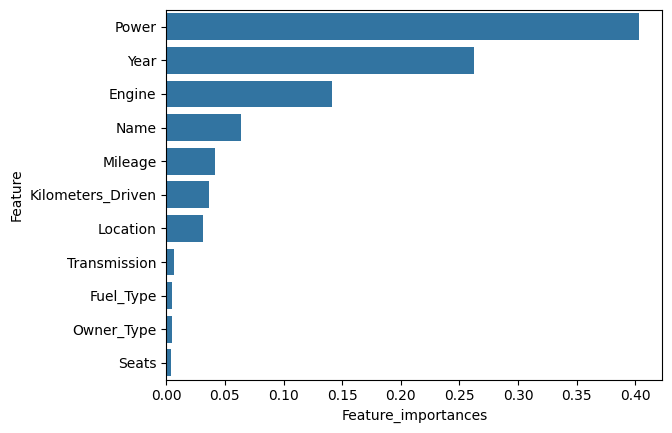

In [50]:
sns.barplot(y=imp['Feature'],x=imp['Feature_importances'])
plt.show()